In [26]:
import pandas as pd
# import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
import dateutil.parser

> First, I made a mistake naming the data set! **It's 2015 data, not 2014 data.** But yes, still use `311-2014.csv`. You can rename it.

# Importing and preparing your data

Import your data, but **only the first 200,000 rows**. You'll also want to change the index to be a datetime based on the **Created Date** column - you'll want to check if it's already a datetime, and parse it if not.

In [27]:
df=pd.read_csv("311-2014.csv",nrows=20000)

/usr/local/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2723: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [28]:
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31015465,07/06/2015 10:58:27 AM,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)"
1,30997660,07/03/2015 01:26:29 PM,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)"
2,31950223,11/09/2015 03:55:09 AM,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)"
3,31000038,07/03/2015 02:18:32 AM,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)"
4,30995614,07/04/2015 12:03:27 AM,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)"


In [77]:
df.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 53 columns):
Unique Key                        20000 non-null int64
Created Date                      20000 non-null object
Closed Date                       18788 non-null object
Agency                            20000 non-null object
Agency Name                       20000 non-null object
Complaint Type                    20000 non-null object
Descriptor                        19745 non-null object
Location Type                     18372 non-null object
Incident Zip                      18779 non-null object
Incident Address                  15073 non-null object
Street Name                       15069 non-null object
Cross Street 1                    13224 non-null object
Cross Street 2                    13179 non-null object
Intersection Street 1             2992 non-null object
Intersection Street 2             2965 non-null object
Address Type                      18095 non-null objec

In [30]:
dateutil.parser.parse('07/16/1990').month

7

In [31]:
def parse_date (str_date):
    return dateutil.parser.parse(str_date)#dateutil is a module, import parser class, then transform a string into a python time object
df['Created Date']= df['Created Date'].apply(parse_date)
df.head(3)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,31015465,2015-07-06 10:58:27,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)"
1,30997660,2015-07-03 13:26:29,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)"
2,31950223,2015-11-09 03:55:09,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)"


What was the **most popular type of complaint**, and how many times was it filed?

In [72]:
df['Complaint Type'].value_counts()
# the most popular type of complaint is blocked driveway, and it was filed 2534 times

Blocked Driveway                           2534
Illegal Parking                            2410
Noise - Street/Sidewalk                    1584
Street Condition                           1216
Noise - Commercial                         1162
Consumer Complaint                          705
Benefit Card Replacement                    701
Broken Muni Meter                           690
Derelict Vehicle                            538
Noise - Vehicle                             530
Taxi Complaint                              489
Damaged Tree                                420
Overgrown Tree/Branches                     365
Highway Condition                           364
HEAT/HOT WATER                              359
Maintenance or Facility                     333
Food Establishment                          325
Animal Abuse                                292
Graffiti                                    269
SCRIE                                       235
Dead Tree                               

Make a horizontal bar graph of the **top 5 most frequent complaint types**.

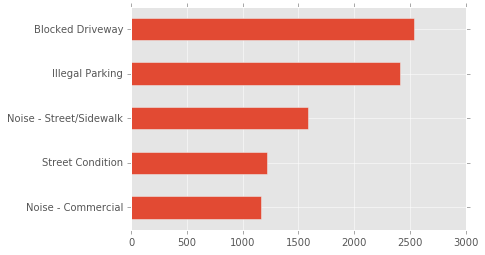

In [75]:
df['Complaint Type'].value_counts().head(5).sort_values().plot(kind='barh')

Which borough has the **most complaints per capita?** Since it's only 5 boroughs, you can do the math manually.

In [78]:
df['Borough'].value_counts()

BROOKLYN         5761
QUEENS           5500
MANHATTAN        4491
BRONX            2446
Unspecified       988
STATEN ISLAND     814
Name: Borough, dtype: int64

In [79]:
people_bronx= 1438159
people_queens= 2321580
people_manhattan=1636268
people_brooklyn= 2621793
people_staten_island= 473279

In [80]:
complaints_per_capita_bronx= 29610/people_bronx
complaints_per_capita_bronx

0.020588822237318682

According to your selection of data, **how many cases were filed in March?** How about May?

In [38]:
[x for x in list(df['Created Date'].values)]# if np.datetime64(x, 'M') == 3]

[numpy.datetime64('2015-07-06T10:58:27.000000000'),
 numpy.datetime64('2015-07-03T13:26:29.000000000'),
 numpy.datetime64('2015-11-09T03:55:09.000000000'),
 numpy.datetime64('2015-07-03T02:18:32.000000000'),
 numpy.datetime64('2015-07-04T00:03:27.000000000'),
 numpy.datetime64('2015-07-09T00:00:00.000000000'),
 numpy.datetime64('2015-07-09T12:04:06.000000000'),
 numpy.datetime64('2015-07-09T00:00:00.000000000'),
 numpy.datetime64('2015-08-12T11:09:49.000000000'),
 numpy.datetime64('2015-09-09T21:59:03.000000000'),
 numpy.datetime64('2015-09-09T12:12:46.000000000'),
 numpy.datetime64('2015-09-22T13:50:05.000000000'),
 numpy.datetime64('2015-09-22T13:12:13.000000000'),
 numpy.datetime64('2015-09-22T15:07:51.000000000'),
 numpy.datetime64('2015-04-28T18:26:58.000000000'),
 numpy.datetime64('2015-04-28T17:54:46.000000000'),
 numpy.datetime64('2015-09-13T13:35:02.000000000'),
 numpy.datetime64('2015-09-13T21:04:42.000000000'),
 numpy.datetime64('2015-07-04T16:57:07.000000000'),
 numpy.datet

In [39]:
date_index = pd.DatetimeIndex(df['Created Date'].values)#for dataframe, each column is a series(object), call a values method

In [59]:
len([x for x in date_index.month if x == 3])

2361

In [70]:
iterable = filter(lambda x: x == 3, list(date_index.month))

In [71]:
march_days = 0
for x in iterable:
    march_days += 1
march_days

2361

I'd like to see all of the 311 complaints **called in on April 1st.**

> **Surprise!** We couldn't do this in class, but it was just a limitation of our data set

In [83]:
df.index=df['Created Date']
df.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2015-07-06 10:58:27,31015465,2015-07-06 10:58:27,07/22/2015 01:07:20 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Demand for Cash,NaN,11360,27-16 203 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.773540,-73.788237,"(40.773539552542, -73.78823697228408)"
2015-07-03 13:26:29,30997660,2015-07-03 13:26:29,07/03/2015 02:08:20 PM,NYPD,New York City Police Department,Vending,In Prohibited Area,Residential Building/House,10019,200 CENTRAL PARK SOUTH,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.767021,-73.979448,"(40.76702142171206, -73.97944780718524)"
2015-11-09 03:55:09,31950223,2015-11-09 03:55:09,11/09/2015 08:08:57 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10453,1993 GRAND AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.852671,-73.910608,"(40.85267061877697, -73.91060771362552)"
2015-07-03 02:18:32,31000038,2015-07-03 02:18:32,07/03/2015 07:54:48 AM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11372,84-16 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.755774,-73.883262,"(40.755773786469966, -73.88326243225418)"
2015-07-04 00:03:27,30995614,2015-07-04 00:03:27,07/04/2015 03:33:09 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talking,Street/Sidewalk,11216,1057 BERGEN STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.676175,-73.951269,"(40.67617516102934, -73.9512690004692)"


What was the most popular type of complaint on April 1st?

What were the **most popular three types of complaint** on April 1st

In [84]:
df['2015-04-01']

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
Created Date,,,,,,,,,,,,,,,,,,,,,
2015-04-01 21:37:42,30311691,2015-04-01 21:37:42,04/01/2015 10:49:33 PM,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11234,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.609810,-73.922498,"(40.60980966645303, -73.92249759633725)"
2015-04-01 23:12:04,30307701,2015-04-01 23:12:04,04/01/2015 11:32:40 PM,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Store/Commercial,11205,700 MYRTLE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.694644,-73.955504,"(40.694643700748486, -73.95550356170298)"
2015-04-01 13:10:35,30313389,2015-04-01 13:10:35,04/07/2015 04:01:08 PM,DPR,Department of Parks and Recreation,Root/Sewer/Sidewalk Condition,Trees and Sidewalks Program,Street,11422,245-16 149 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.653016,-73.738626,"(40.653016256598534, -73.73862588133056)"
2015-04-01 17:37:38,30314393,2015-04-01 17:37:38,04/03/2015 11:40:54 AM,DPR,Department of Parks and Recreation,Maintenance or Facility,Hours of Operation,Park,11211,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01 12:32:40,30309207,2015-04-01 12:32:40,04/17/2015 01:06:49 AM,DCA,Department of Consumer Affairs,Consumer Complaint,Installation/Work Quality,NaN,11423,90-71 198 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.714299,-73.761158,"(40.71429859671565, -73.76115807774032)"
2015-04-01 18:44:50,30311759,2015-04-01 18:44:50,06/24/2015 11:27:00 AM,DPR,Department of Parks and Recreation,Damaged Tree,Entire Tree Has Fallen Down,Street,10467,862 EAST 213 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.878028,-73.860237,"(40.87802828144708, -73.86023734606933)"
2015-04-01 16:30:15,30309690,2015-04-01 16:30:15,04/01/2015 11:27:22 PM,NYPD,New York City Police Department,Animal Abuse,Neglected,Residential Building/House,11368,107-15 NORTHERN BOULEVARD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.757811,-73.861677,"(40.757811195752154, -73.86167714731972)"
2015-04-01 09:04:07,30307990,2015-04-01 09:04:07,04/06/2015 09:17:10 AM,DOF,Senior Citizen Rent Increase Exemption Unit,SCRIE,Miscellaneous,Senior Address,10027,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-04-01 07:46:58,30308253,2015-04-01 07:46:58,04/01/2015 09:32:31 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11370,32-51 80 STREET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.756412,-73.887405,"(40.75641194675221, -73.88740503059863)"


In [85]:
df['2015-04-01']['Complaint Type'].value_counts().head(3)

Street Condition      18
Illegal Parking       15
Consumer Complaint    12
Name: Complaint Type, dtype: int64

**What month has the most reports filed?** How many? Graph it.

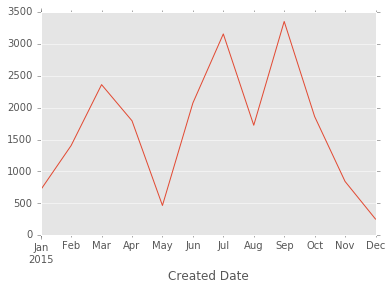

In [90]:
df.resample('M').count().plot(y="Unique Key",legend=False)
#http://pandas.pydata.org/pandas-docs/stable/timeseries.html#up-and-downsampling
#resample is a time-based groupby, followed by a reduction method on each of its groups

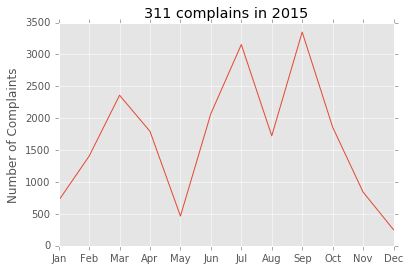

In [91]:
ax= df.groupby(df.index.month).count().plot(y='Unique Key', legend=False)
ax.set_xticks([1,2,3,4,5,6,7,8,9,10,11, 12])
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
ax.set_ylabel("Number of Complaints")
ax.set_title("311 complains filed monthly in 2015")
#september has the most complaints cases filed

**What week of the year has the most reports filed?** How many? Graph the weekly complaints.

Noise complaints are a big deal. Use `.str.contains` to select noise complaints, and make an chart of when they show up annually. **Then** make a chart about when they show up every day (cyclic).

**Which were the top five days of the year for filing complaints?** How many on each of those days? Graph it.

**What hour of the day are the most complaints?** Graph a day of complaints.

One of the hours has an odd number of complaints. What are the most common complaints at that hour, and what are the most common complaints the hour before and after?

So odd. What's the **per-minute breakdown** of complaints between 12am and 1am? You don't need to include 1am.

Looks like midnight is a little bit of an outlier. Why might that be? Take the 5 most common agencies and graph the times they file reports at (all day, not just midnight).

Graph those same agencies on an annual basis - make it **weekly**. When do people like to complain? When does the NYPD have an odd number of complaints?

Maybe the NYPD deals with different issues at different times? Check the most popular complaints in July and August vs the month of May. Also check the most common complaints for the Housing Preservation Bureau (HPD) in winter vs. summer.